In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("mammographic_masses_converted_cleaned.csv" ,dtype=int)
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1


In [7]:
df.shape

(961, 6)

In [8]:
training_size = [1, 100,300,500,739]

In [34]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

features = ['BI-RADS', 'Age','Shape', 'Margin', 'Density']
target = ['Severity']

traing_size, train_scores, validation_score = learning_curve(estimator = RandomForestClassifier(),
                                                                 X = df[features], y = df[target],
                                                             train_sizes = training_size, scoring = 'accuracy', cv = 5)
                                                            

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [13]:
print('Training scores : ', train_scores)
print('-' * 70)
print('Validation scores: ', validation_score)


Training scores :  [[1.         1.         1.         1.         1.        ]
 [1.         0.98       0.98       0.98       0.98      ]
 [0.98       0.96       0.97666667 0.97666667 0.97666667]
 [0.952      0.936      0.952      0.962      0.962     ]
 [0.9391069  0.932341   0.94181326 0.94993234 0.94046008]]
----------------------------------------------------------------------
Validation scores:  [[0.5388601  0.46354167 0.46354167 0.46354167 0.46354167]
 [0.8134715  0.796875   0.84375    0.75520833 0.765625  ]
 [0.80310881 0.8125     0.82291667 0.75       0.76041667]
 [0.8134715  0.82291667 0.83333333 0.75       0.77083333]
 [0.78238342 0.80208333 0.82291667 0.74479167 0.78645833]]


In [17]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_score.mean(axis  = 1)
print('Mean training scores \n', pd.Series(train_scores_mean, index=training_size))

Mean training scores 
 1      1.000000
100    0.984000
300    0.974000
500    0.952800
739    0.940731
dtype: float64


In [18]:
print('Mean validation scores \n', pd.Series(validation_scores_mean, index=training_size))

Mean validation scores 
 1      0.478605
100    0.794986
300    0.789788
500    0.798111
739    0.787727
dtype: float64


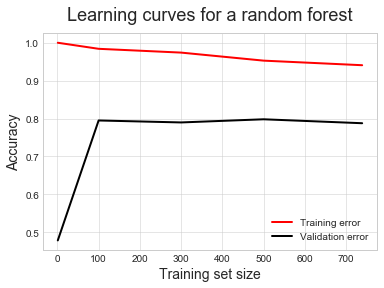

In [33]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(training_size, train_scores_mean, label = 'Training error', color ='r')
plt.plot(training_size, validation_scores_mean, label = 'Validation error', color = 'black')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest', fontsize = 18, y = 1.03)
plt.legend()

When the size of the dataset is one, it is expected to have 100% accuracy on training because model has no problem with fitting perfectly a single instance. 

Even we include more data instance in our model, resulting validation will not be same as it is roughly same from 500 training data points onward. Instead, we need to change model to decrease the complexity of it. (regularization)

In order to understand how good model generalizes on the unseen data, we need to test the model. If your model gives good accuracy on training dataset but low accuracy when you test it, your model is not generalized well on unseen data. This also indicates the high variance, ultimately, overfitting issue. The gap between the two lines also indicator of high variance. 

To summarize, our model suffers from high variance. It is overfitting the training data.

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

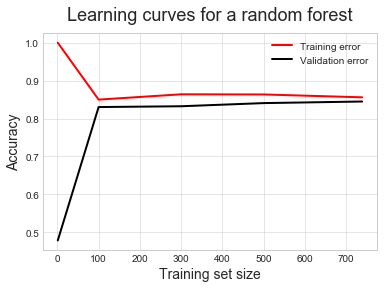

In [35]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

features = ['BI-RADS', 'Age','Shape', 'Margin', 'Density']
target = ['Severity']

traing_size, train_scores, validation_score = learning_curve(estimator = RandomForestClassifier(min_samples_leaf=5),
                                                                 X = df[features], y = df[target],
                                                             train_sizes = training_size, scoring = 'accuracy', cv = 5)
                                                            
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_score.mean(axis  = 1)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(training_size, train_scores_mean, label = 'Training error', color ='r')
plt.plot(training_size, validation_scores_mean, label = 'Validation error', color = 'black')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest', fontsize = 18, y = 1.03)
plt.legend()

Just by chainging total number of nodes required to split to 5, we decreased the variance dramatically. 